<a href="https://colab.research.google.com/github/jubymariajoseph/DSA-Activities/blob/main/Case_study_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import time
import numpy as np

In [2]:
#  Load dataset into a dataframe
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
df =pd.read_csv(url)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-09-21T13:50:53.610Z,33.031500,-116.292333,6.800000,0.33,ml,20.0,56.000000,0.077250,0.200000,...,2025-09-21T13:54:24.380Z,"20 km SW of Ocotillo Wells, CA",earthquake,0.300000,0.750000,0.174000,3.0,automatic,ci,ci
1,2025-09-21T13:46:15.460Z,35.638833,-117.456000,7.070000,0.95,ml,27.0,54.000000,0.037140,0.140000,...,2025-09-21T13:49:45.754Z,"15 km SSW of Searles Valley, CA",earthquake,0.190000,0.410000,0.170000,13.0,automatic,ci,ci
2,2025-09-21T13:45:02.595Z,35.345314,-97.936180,4.117767,1.61,ml,11.0,94.203613,0.047892,0.675563,...,2025-09-21T13:46:51.380Z,"3 km NNE of Minco, Oklahoma",earthquake,3.943303,2.921672,0.180000,9.0,automatic,ok,ok
3,2025-09-21T13:36:34.500Z,33.246167,-116.584667,19.780000,0.57,ml,6.0,234.000000,0.106900,0.150000,...,2025-09-21T13:40:13.849Z,"6 km SE of Warner Springs, CA",earthquake,1.430000,0.710000,0.189000,11.0,automatic,ci,ci
4,2025-09-21T13:35:21.131Z,61.438900,-148.224900,0.000000,1.50,ml,NaN,NaN,NaN,0.490000,...,2025-09-21T13:38:07.791Z,"36 km E of Knik River, Alaska",earthquake,NaN,1.700000,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,2025-08-22T14:31:19.677Z,31.560000,-104.128000,7.022700,0.90,ml,17.0,66.000000,0.000000,0.100000,...,2025-09-05T15:50:08.345Z,"41 km NW of Toyah, Texas",earthquake,0.848763,0.675064,0.200000,18.0,reviewed,tx,tx
9900,2025-08-22T14:28:02.476Z,62.078100,-150.638800,9.900000,1.20,ml,NaN,NaN,NaN,0.480000,...,2025-08-22T14:30:54.881Z,"34 km SW of Trapper Creek, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak
9901,2025-08-22T14:24:28.350Z,37.329833,-122.126167,6.030000,0.75,md,11.0,109.000000,0.024250,0.080000,...,2025-08-25T20:49:54.768Z,"3 km SW of Loyola, CA",earthquake,0.300000,0.500000,0.200000,8.0,reviewed,nc,nc
9902,2025-08-22T14:11:37.420Z,31.618000,-101.438000,6.909200,1.40,ml,11.0,79.000000,0.300000,0.200000,...,2025-08-22T18:19:35.520Z,"27 km S of Garden City, Texas",earthquake,1.074784,1.958292,0.200000,8.0,reviewed,tx,tx


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9904 entries, 0 to 9903
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9904 non-null   object 
 1   latitude         9904 non-null   float64
 2   longitude        9904 non-null   float64
 3   depth            9904 non-null   float64
 4   mag              9903 non-null   float64
 5   magType          9903 non-null   object 
 6   nst              8764 non-null   float64
 7   gap              8764 non-null   float64
 8   dmin             8763 non-null   float64
 9   rms              9903 non-null   float64
 10  net              9904 non-null   object 
 11  id               9904 non-null   object 
 12  updated          9904 non-null   object 
 13  place            9904 non-null   object 
 14  type             9904 non-null   object 
 15  horizontalError  7883 non-null   float64
 16  depthError       9902 non-null   float64
 17  magError      

In [4]:
#  Number of records
print("The number of records are: ",df.shape[0])

The number of records are:  9904


In [5]:
# unique locations
locations = df['place'].unique()
print("Number of unique locations:",len(locations))
print(locations)

Number of unique locations: 5249
['20 km SW of Ocotillo Wells, CA' '15 km SSW of Searles Valley, CA'
 '3 km NNE of Minco, Oklahoma' ... '17 km NNE of Four Mile Road, Alaska'
 '3 km S of Highland, CA' '27 km S of Garden City, Texas']


In [6]:
# top 5 rows
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-09-21T13:50:53.610Z,33.031500,-116.292333,6.800000,0.33,ml,20.0,56.000000,0.077250,0.200000,...,2025-09-21T13:54:24.380Z,"20 km SW of Ocotillo Wells, CA",earthquake,0.300000,0.750000,0.174,3.0,automatic,ci,ci
1,2025-09-21T13:46:15.460Z,35.638833,-117.456000,7.070000,0.95,ml,27.0,54.000000,0.037140,0.140000,...,2025-09-21T13:49:45.754Z,"15 km SSW of Searles Valley, CA",earthquake,0.190000,0.410000,0.170,13.0,automatic,ci,ci
2,2025-09-21T13:45:02.595Z,35.345314,-97.936180,4.117767,1.61,ml,11.0,94.203613,0.047892,0.675563,...,2025-09-21T13:46:51.380Z,"3 km NNE of Minco, Oklahoma",earthquake,3.943303,2.921672,0.180,9.0,automatic,ok,ok
3,2025-09-21T13:36:34.500Z,33.246167,-116.584667,19.780000,0.57,ml,6.0,234.000000,0.106900,0.150000,...,2025-09-21T13:40:13.849Z,"6 km SE of Warner Springs, CA",earthquake,1.430000,0.710000,0.189,11.0,automatic,ci,ci
4,2025-09-21T13:35:21.131Z,61.438900,-148.224900,0.000000,1.50,ml,NaN,NaN,NaN,0.490000,...,2025-09-21T13:38:07.791Z,"36 km E of Knik River, Alaska",earthquake,NaN,1.700000,NaN,NaN,automatic,ak,ak


In [7]:
# colums in the dataset
print("The columns are :",df.columns)

The columns are : Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


In [8]:
#  Convert time to datetime
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9904 entries, 0 to 9903
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             9904 non-null   datetime64[ns, UTC]
 1   latitude         9904 non-null   float64            
 2   longitude        9904 non-null   float64            
 3   depth            9904 non-null   float64            
 4   mag              9903 non-null   float64            
 5   magType          9903 non-null   object             
 6   nst              8764 non-null   float64            
 7   gap              8764 non-null   float64            
 8   dmin             8763 non-null   float64            
 9   rms              9903 non-null   float64            
 10  net              9904 non-null   object             
 11  id               9904 non-null   object             
 12  updated          9904 non-null   object             
 13  place            9

In [9]:
#  Drop records with missing latitude, longitude, mag

df_clean = df.dropna(subset=['latitude', 'longitude', 'mag'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9903 entries, 0 to 9903
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             9903 non-null   datetime64[ns, UTC]
 1   latitude         9903 non-null   float64            
 2   longitude        9903 non-null   float64            
 3   depth            9903 non-null   float64            
 4   mag              9903 non-null   float64            
 5   magType          9903 non-null   object             
 6   nst              8764 non-null   float64            
 7   gap              8764 non-null   float64            
 8   dmin             8763 non-null   float64            
 9   rms              9903 non-null   float64            
 10  net              9903 non-null   object             
 11  id               9903 non-null   object             
 12  updated          9903 non-null   object             
 13  place            9903 n

In [10]:
df_clean[['mag', 'nst']].head(30)

,mag,nst
0,0.33,20.0
1,0.95,27.0
2,1.61,11.0
3,0.57,6.0
4,1.50,NaN
5,0.79,13.0
6,4.60,39.0
7,1.02,12.0
8,-0.40,8.0
9,1.66,30.0


In [11]:
#   Filter only earthquakes with magnitude >= 4.0
df_clean[df_clean['mag']>=4.0]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
6,2025-09-21 13:28:44.745000+00:00,65.8338,-37.4416,10.000,4.6,mb,39.0,123.0,5.4190,0.81,...,2025-09-21T13:52:58.040Z,"26 km NNE of Tasiilaq, Greenland",earthquake,10.19,1.919,0.036,227.0,reviewed,us,us
16,2025-09-21 11:07:35.234000+00:00,50.9904,159.0834,27.703,4.5,mb,34.0,215.0,2.0540,0.84,...,2025-09-21T11:29:02.040Z,"188 km ESE of Ozernovskiy, Russia",earthquake,15.55,7.382,0.094,33.0,reviewed,us,us
19,2025-09-21 10:30:54.743000+00:00,2.8209,95.3997,18.872,4.4,mb,36.0,204.0,2.6450,0.49,...,2025-09-21T12:11:20.040Z,"115 km WNW of Sinabang, Indonesia",earthquake,9.79,6.379,0.110,24.0,reviewed,us,us
28,2025-09-21 09:30:27.882000+00:00,51.2024,-178.0199,30.000,5.5,mww,147.0,42.0,0.5590,1.08,...,2025-09-21T13:40:36.354Z,"121 km SW of Adak, Alaska",earthquake,3.97,1.809,0.046,46.0,reviewed,us,us
32,2025-09-21 09:08:58.898000+00:00,-31.9244,-66.9156,138.171,4.6,mb,99.0,51.0,1.5420,0.68,...,2025-09-21T09:28:39.040Z,"93 km NNW of Villa General Roca, Argentina",earthquake,6.85,7.301,0.035,251.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,2025-08-22 17:11:05.982000+00:00,-60.3121,-62.3660,10.000,4.3,mb,10.0,152.0,4.5460,1.23,...,2025-09-17T19:50:48.040Z,Drake Passage,earthquake,16.52,1.949,0.189,9.0,reviewed,us,us
9861,2025-08-22 16:28:42.530000+00:00,18.8243,-67.2471,10.000,4.3,ml,27.0,186.0,0.3818,0.21,...,2025-09-20T19:17:56.040Z,"39 km NNW of San Antonio, Puerto Rico",earthquake,0.60,0.850,0.090,22.0,reviewed,pr,pr
9862,2025-08-22 16:25:22.017000+00:00,52.2884,160.9574,10.000,4.8,mb,37.0,192.0,1.5870,0.89,...,2025-09-20T17:04:39.040Z,"179 km ESE of Petropavlovsk-Kamchatsky, Russia",earthquake,12.65,1.960,0.060,85.0,reviewed,us,us
9875,2025-08-22 15:57:35.988000+00:00,51.2884,159.4807,10.000,5.1,mb,77.0,117.0,1.8110,0.81,...,2025-09-20T16:48:10.040Z,"197 km SSE of Vilyuchinsk, Russia",earthquake,8.32,1.873,0.049,134.0,reviewed,us,us


In [12]:
#  Add a column day_of_week from time
df_clean['day_of_week'] = df_clean['time'].dt.day_name()
df_clean.head()

/tmp/ipython-input-3463907278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['day_of_week'] = df_clean['time'].dt.day_name()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,day_of_week
0,2025-09-21 13:50:53.610000+00:00,33.031500,-116.292333,6.800000,0.33,ml,20.0,56.000000,0.077250,0.200000,...,"20 km SW of Ocotillo Wells, CA",earthquake,0.300000,0.750000,0.174,3.0,automatic,ci,ci,Sunday
1,2025-09-21 13:46:15.460000+00:00,35.638833,-117.456000,7.070000,0.95,ml,27.0,54.000000,0.037140,0.140000,...,"15 km SSW of Searles Valley, CA",earthquake,0.190000,0.410000,0.170,13.0,automatic,ci,ci,Sunday
2,2025-09-21 13:45:02.595000+00:00,35.345314,-97.936180,4.117767,1.61,ml,11.0,94.203613,0.047892,0.675563,...,"3 km NNE of Minco, Oklahoma",earthquake,3.943303,2.921672,0.180,9.0,automatic,ok,ok,Sunday
3,2025-09-21 13:36:34.500000+00:00,33.246167,-116.584667,19.780000,0.57,ml,6.0,234.000000,0.106900,0.150000,...,"6 km SE of Warner Springs, CA",earthquake,1.430000,0.710000,0.189,11.0,automatic,ci,ci,Sunday
4,2025-09-21 13:35:21.131000+00:00,61.438900,-148.224900,0.000000,1.50,ml,NaN,NaN,NaN,0.490000,...,"36 km E of Knik River, Alaska",earthquake,NaN,1.700000,NaN,NaN,automatic,ak,ak,Sunday


In [13]:
#  Create a column severity_level based on magnitude:
#  ○ <4.0: "Low"
#  ○ 4.0 - 6.0: "Moderate"
#  ○ 6.0+: "High"

conditions = [df_clean['mag']<4.0, (df_clean['mag']>=4.0) & (df_clean['mag']<=6.0), df_clean['mag']>6.0];
choices = ['Low', 'Moderate', 'High']
df_clean['severity_level'] = np.select(conditions, choices, default='Unknown')
df_clean

/tmp/ipython-input-3536314956.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['severity_level'] = np.select(conditions, choices, default='Unknown')


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,day_of_week,severity_level
0,2025-09-21 13:50:53.610000+00:00,33.031500,-116.292333,6.800000,0.33,ml,20.0,56.000000,0.077250,0.200000,...,earthquake,0.300000,0.750000,0.174000,3.0,automatic,ci,ci,Sunday,Low
1,2025-09-21 13:46:15.460000+00:00,35.638833,-117.456000,7.070000,0.95,ml,27.0,54.000000,0.037140,0.140000,...,earthquake,0.190000,0.410000,0.170000,13.0,automatic,ci,ci,Sunday,Low
2,2025-09-21 13:45:02.595000+00:00,35.345314,-97.936180,4.117767,1.61,ml,11.0,94.203613,0.047892,0.675563,...,earthquake,3.943303,2.921672,0.180000,9.0,automatic,ok,ok,Sunday,Low
3,2025-09-21 13:36:34.500000+00:00,33.246167,-116.584667,19.780000,0.57,ml,6.0,234.000000,0.106900,0.150000,...,earthquake,1.430000,0.710000,0.189000,11.0,automatic,ci,ci,Sunday,Low
4,2025-09-21 13:35:21.131000+00:00,61.438900,-148.224900,0.000000,1.50,ml,NaN,NaN,NaN,0.490000,...,earthquake,NaN,1.700000,NaN,NaN,automatic,ak,ak,Sunday,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,2025-08-22 14:31:19.677000+00:00,31.560000,-104.128000,7.022700,0.90,ml,17.0,66.000000,0.000000,0.100000,...,earthquake,0.848763,0.675064,0.200000,18.0,reviewed,tx,tx,Friday,Low
9900,2025-08-22 14:28:02.476000+00:00,62.078100,-150.638800,9.900000,1.20,ml,NaN,NaN,NaN,0.480000,...,earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak,Friday,Low
9901,2025-08-22 14:24:28.350000+00:00,37.329833,-122.126167,6.030000,0.75,md,11.0,109.000000,0.024250,0.080000,...,earthquake,0.300000,0.500000,0.200000,8.0,reviewed,nc,nc,Friday,Low
9902,2025-08-22 14:11:37.420000+00:00,31.618000,-101.438000,6.909200,1.40,ml,11.0,79.000000,0.300000,0.200000,...,earthquake,1.074784,1.958292,0.200000,8.0,reviewed,tx,tx,Friday,Low


In [14]:
d=df_clean['type'].unique();
d

array(['earthquake', 'explosion', 'quarry blast', 'landslide'],
      dtype=object)

In [21]:
#  Count number of earthquakes per place
count = df_clean[df_clean['type'] == 'earthquake']['place'].value_counts()
count

,count
place,
"15 km NE of Milford, Utah",203
"27 km W of Hebgen Lake Estates, Montana",81
"7 km WNW of Cobb, CA",59
"7 km NNW of The Geysers, CA",57
"6 km WNW of Cobb, CA",50
...,...
"8 km N of Hollister, CA",1
"35 km W of Tatitlek, Alaska",1
"69 km NW of Karluk, Alaska",1


In [16]:
#  Compute average magnitude and max depth per day
df_clean['date'] = df_clean['time'].dt.date;

stats = df_clean.groupby('date').agg(average_magnitude=('mag', 'mean'),max_depth=('depth', 'max'));
stats.head()

/tmp/ipython-input-31041893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['date'] = df_clean['time'].dt.date;


,average_magnitude,max_depth
date,,
2025-08-22,1.320261,515.056
2025-08-23,1.565403,565.087
2025-08-24,1.442605,499.800
2025-08-25,1.228933,126.766
2025-08-26,1.394417,612.812


In [18]:
df_clean = df_clean.drop_duplicates()
df_clean.shape

(9903, 25)

In [19]:
#  save cleaned database
df.to_csv("Earthquakes_details.csv", index = False)

In [22]:
stats.to_csv("Earthquake_date_summary", index = False)
count.to_csv("Earthquake_place_summary", index = False)

In [23]:
#  store into SQLite table
import sqlite3

In [24]:
conn = sqlite3.connect("Earthquakes.db")
cursor = conn.cursor()

In [25]:
df_clean.to_sql("Earthquake_details", conn, if_exists="replace", index = False)

9903

In [26]:
stats.to_sql("Earthquake_date_summary",conn)
count.to_sql("Earthquake_place_summary",conn)

5100

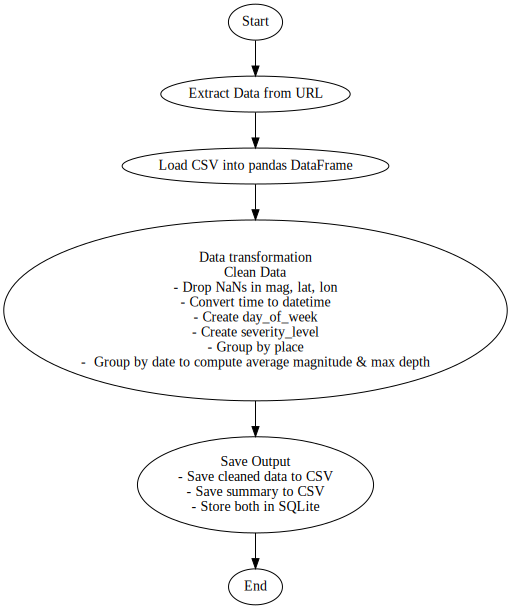

In [30]:
#  Flowchart
from graphviz import Digraph

dot = Digraph(comment='ETL Flowchart')

dot.node('A', 'Start')
dot.node('B', 'Extract Data from URL')
dot.node('C', 'Load CSV into pandas DataFrame')
dot.node('D', 'Data transformation \n Clean Data\n- Drop NaNs in mag, lat, lon\n- Convert time to datetime\n- Create day_of_week\n- Create severity_level \n- Group by place\n-  Group by date to compute average magnitude & max depth')
dot.node('E', 'Save Output\n- Save cleaned data to CSV\n- Save summary to CSV\n- Store both in SQLite')
dot.node('F', 'End')


dot.edges(['AB', 'BC', 'CD', 'DE', 'EF'])


dot


**A short explanation of your process**

The dataset was first extracted from the url. The extracted dataset was then converted into dataframe using pandas library. The transformation step was next. The data was cleaned by converting the time column in object to datetime, missing values in longitude, lattitude and magnitude columns were droped. Two new columns - day_of_week and severity_level which shows the day the the details are taken and level of impact were created. The data was grouped by place and the number of times a earthquake occured ewas found and grouped by date to find the average of magnitude and maximum of depth were found.
The cleaned data and summury was saved to CSV and SQLite.

In [33]:
#  One insight your team discovered from the data

top_areas = df_clean['place'].value_counts().head(10)

# Display top 10 most earthquake-prone areas
print(top_areas)


place
15 km NE of Milford, Utah                  203
27 km W of Hebgen Lake Estates, Montana     81
7 km WNW of Cobb, CA                        59
7 km NNW of The Geysers, CA                 57
6 km WNW of Cobb, CA                        50
8 km NNW of The Geysers, CA                 49
47 km ESE of Beatty, Nevada                 47
56 km S of Whites City, New Mexico          47
38 km WSW of False Pass, Alaska             46
21 km ESE of Little Lake, CA                46
Name: count, dtype: int64


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


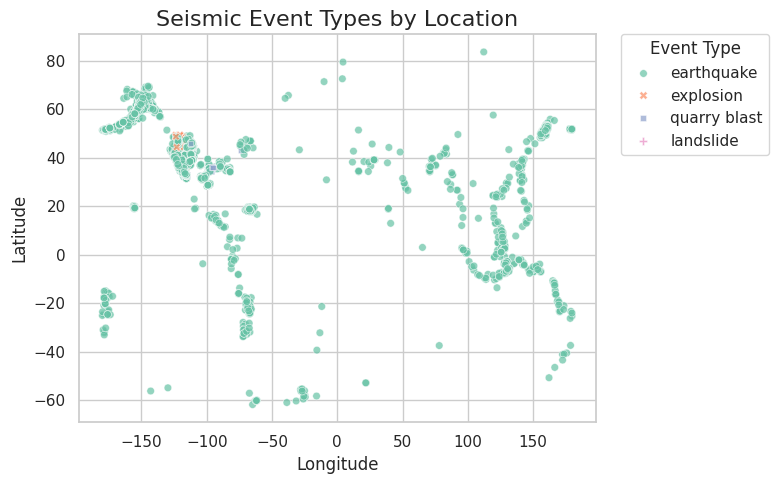

In [40]:
# Set plot style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_clean,
    x='longitude',
    y='latitude',
    hue='type',           # Color by type (e.g., earthquake, explosion)
    style='type',         # Optional: different marker shapes
    palette='Set2',       # Choose a nice color palette
    alpha=0.7,
    s=30
)

plt.title("Seismic Event Types by Location", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Event Type',bbox_to_anchor=(1.05, 1),  loc='upper left',borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()


The areas prone to earthquakes lie between the lattitude 20 and 60. Also the londitudes are -150 to -100. The place highly prone to events is milford uttah.